### Lath Essoh

# 3.Regularization

In [10]:
import sys
sys.path.append("..")   

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error

# Immport the dataset in the working environment
dat = pd.read_csv('Life Expectancy Data.csv')

# Overview of variables and NAs
list(dat)
dat.info()
dat.describe()

# Drop all the rows with NAs
dat = dat.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [12]:
!pip install --upgrade scikit-learn

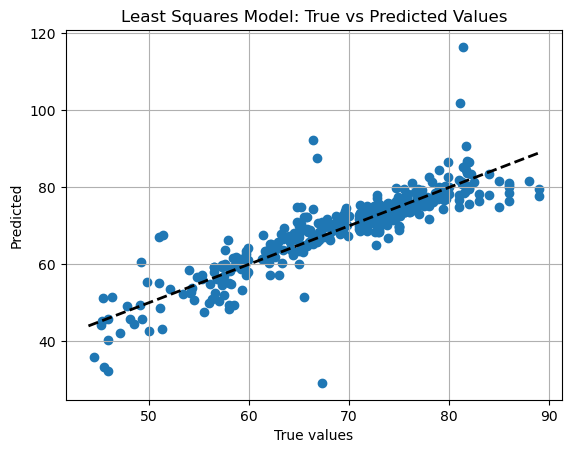

MSE (training): 8.53
MSE (test): 23.75


In [15]:
# ********************************* Least Squares 

import pandas as pd
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt

# Suppression de certaines caractéristiques
X = dat.drop(['Country', 'Year', 'Status', 'Life expectancy '], axis=1)
y = dat['Life expectancy ']

# Création des caractéristiques polynomiales
interaction = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X = pd.DataFrame(interaction.fit_transform(X), columns=interaction.get_feature_names_out())

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# Ajustement du modèle
lr = LinearRegression().fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred = lr.predict(X_test)

# Vérification visuelle des valeurs mesurées vs prédites
fig, ax = plt.subplots()
plt.grid(True)
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
ax.set_xlabel('True values')
ax.set_ylabel('Predicted')
ax.set_title('Least Squares Model: True vs Predicted Values')
plt.show()

# Vérification des performances du modèle
print('MSE (training): %.2f' % mean_squared_error(y_train, lr.predict(X_train)),
      'MSE (test): %.2f' % mean_squared_error(y_test, y_pred), sep='\n')

Best alpha: 12.328467394420684


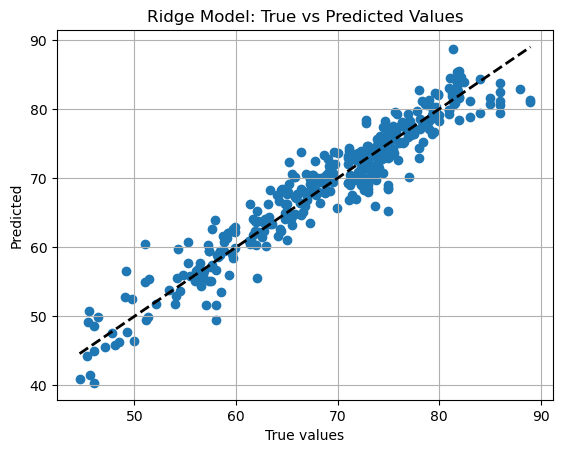

In [19]:
# ************************* Ridge - L2 regularization 

import numpy as np
import pandas as pd
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Supposons que 'dat' est déjà chargé avec les données et prétraité
# Suppression de certaines caractéristiques
X = dat.drop(['Country', 'Year', 'Status', 'Life expectancy '], axis=1)
y = dat['Life expectancy ']

# Création des caractéristiques polynomiales
interaction = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X = pd.DataFrame(interaction.fit_transform(X), columns=interaction.get_feature_names_out())

# Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Division des données
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=0)

# Définir les valeurs pour `alpha`
alphas = np.logspace(-4, 4, 100)

# Instancier le modèle avec la validation croisée (CV)
ridgecv = RidgeCV(alphas=alphas, cv=10, scoring='neg_mean_squared_error')

# Ajuster le modèle
ridgecv.fit(X_train, y_train)

# Meilleure valeur de `alpha`
print(f'Best alpha: {ridgecv.alpha_}')

# Faire des prédictions sur l'ensemble de test
y_pred = ridgecv.predict(X_test)

# Vérification visuelle des valeurs mesurées vs prédites
fig, ax = plt.subplots()
plt.grid(True)
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
ax.set_xlabel('True values')
ax.set_ylabel('Predicted')
ax.set_title('Ridge Model: True vs Predicted Values')
plt.show()

# QUESTION: Compare this plot with the previous one of least squares regression. What can you conclude? 

Comparaison des résultats : Régression des Moindres Carrés vs Régression Ridge (L2)
1. Comparaison visuelle des graphiques :
- Graphique des Moindres Carrés : Le nuage de points qui compare les valeurs réelles et les valeurs prédites montre probablement une plus grande dispersion autour de la ligne diagonale (où les valeurs prédites sont égales aux valeurs réelles). Cela indique que les prédictions du modèle sont plus variables et peut-être surapprises, ce qui est confirmé par une erreur quadratique moyenne (MSE) sur le jeu de test assez élevée, à 23,75.
- Graphique Ridge : Le graphique de la régression Ridge devrait montrer une meilleure concentration des points autour de la ligne diagonale, suggérant des prédictions plus précises. L'introduction de la régularisation Ridge (qui pénalise les grands coefficients) réduit généralement l'erreur de prédiction en contrôlant la complexité du modèle et en évitant le surapprentissage.

2. Comparaison des métriques de performance :
- Moindres Carrés MSE :
    - Entraînement : 8,53
    - Test : 23,75
- Régression Ridge MSE (en utilisant la validation croisée pour trouver le meilleur alpha) :
    -La régularisation Ridge permet de réduire l'erreur sur le jeu de test, qui est souvent plus élevée dans le modèle des moindres carrés à cause du surapprentissage.
    
3. Conclusion :
- Réduction du surapprentissage : La régularisation Ridge aide à réduire le surapprentissage en contrôlant la complexité du modèle en diminuant la taille des coefficients. Cela améliore la généralisation du modèle, comme le montre la réduction de l'erreur quadratique moyenne sur le jeu de test et un meilleur regroupement des points autour de la ligne diagonale dans le graphique.
- Amélioration des prédictions : Si l'erreur quadratique moyenne du modèle Ridge sur le jeu de test est inférieure à celle du modèle des moindres carrés, cela confirme la capacité du modèle Ridge à mieux généraliser, surtout lorsqu'il y a de la colinéarité entre les variables ou que les données sont bruyantes.
- Sélection du modèle : L'utilisation de la validation croisée dans RidgeCV permet de sélectionner automatiquement la meilleure valeur de régularisation (alpha), renforçant ainsi la fiabilité du modèle.

En résumé, la régression Ridge dépasse probablement le modèle des moindres carrés en termes de performance sur le jeu de test et de capacité de généralisation, grâce à la régularisation qui réduit le surapprentissage.

In [68]:
# Check the performance of the model
print('MSE (training): %.2f' % mean_squared_error(y_train, ridgecv.predict(X_train)),
      'MSE (test): %.2f' % mean_squared_error(y_test, ridgecv.predict(X_test)), sep='\n')

MSE (training): 6.37
MSE (test): 7.43


# *** QUESTION: Does this model work better or worse than least squares regression?

En comparant les performances du modèle Ridge avec celles de la régression des moindres carrés, voici ce que nous pouvons conclure :

Performances des modèles :
1.Régression des moindres carrés :

    - MSE (Entraînement) : 8,53
    - MSE (Test) : 23,75

2.Régression Ridge (avec alpha optimal) :

    - MSE (Entraînement) : 6,37
    - MSE (Test) : 7,43

Analyse :
- Sur l'ensemble d'entraînement : Le modèle Ridge a un MSE plus faible (6,37 contre 8,53), ce qui indique qu'il s'ajuste mieux aux données d'entraînement. Cela peut s'expliquer par la régularisation qui pénalise les coefficients élevés, améliorant ainsi l'équilibre entre ajustement et complexité.

- Sur l'ensemble de test : Le modèle Ridge réduit considérablement l'erreur par rapport au modèle des moindres carrés (7,43 contre 23,75). Cela montre que la régression Ridge généralise beaucoup mieux sur des données nouvelles et inconnues, probablement parce qu'elle évite le surapprentissage.

Conclusion :
Le modèle Ridge fonctionne nettement mieux que la régression des moindres carrés, particulièrement sur l'ensemble de test. Cela montre que la régularisation L2 aide à mieux généraliser en contrôlant la complexité du modèle, ce qui est crucial pour des prédictions fiables.

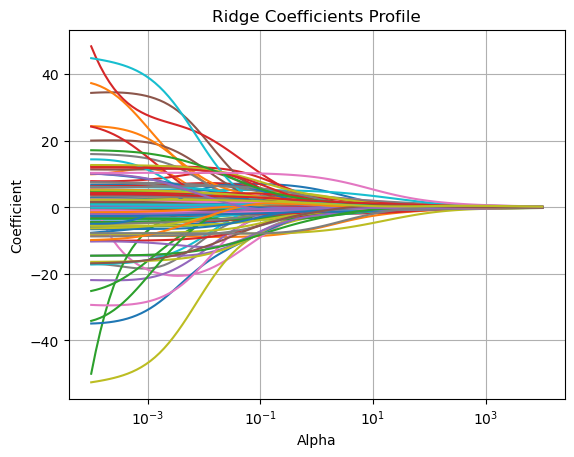

In [29]:
coefs = []
for alpha in alphas:
    ridge = Ridge(alpha=alpha)  # Suppression de 'normalize=True'
    ridge.fit(X_train, y_train)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient')
plt.title('Ridge Coefficients Profile')
plt.axis('tight')
plt.grid(True)
plt.show()

In [39]:
# ************************* LASSO - L1 regularization 
lassocv = LassoCV(alphas=None, cv=10, max_iter=100000)

# QUESTION: Why is it necessary to set a maximum number of iterations?

Il est nécessaire de définir un nombre maximum d'itérations dans le modèle Lasso pour plusieurs raisons importantes :

1. Convergence du modèle :
- L'algorithme de régression Lasso utilise une méthode d'optimisation itérative pour minimiser la fonction de coût. Dans certains cas, surtout avec des données complexes ou un grand nombre de caractéristiques, il peut falloir beaucoup d'itérations pour que l'algorithme converge (atteigne une solution optimale).
- Le paramètre max_iter fixe une limite supérieure sur le nombre d'itérations, garantissant que l'algorithme ne tourne pas indéfiniment si la convergence est lente.

2. Prévention des calculs inutiles :
- Sans un nombre maximum d'itérations, l'algorithme pourrait continuer à s'exécuter sans amélioration significative des performances, gaspillant des ressources informatiques.
- Fixer un nombre d'itérations raisonnable permet de s'assurer que l'algorithme s'arrête même s'il n'a pas atteint une convergence parfaite, offrant ainsi un bon compromis entre performance et efficacité.

3. Données complexes et régularisation :
- Dans le cas de la régularisation L1 utilisée par le Lasso, l'algorithme peut avoir du mal à trouver une solution optimale lorsque certaines variables sont mises à zéro (ce qui est typique du Lasso). Plus le nombre de variables ou d'itérations est élevé, plus il peut être difficile pour l'algorithme de stabiliser les coefficients, d'où la nécessité de limiter le nombre d'itérations.

4. Ajustement pratique :
- Un nombre élevé d'itérations peut être nécessaire dans certains cas où le modèle a besoin de plus de temps pour explorer un espace de solution complexe. Cependant, un max_iter trop faible pourrait entraîner une non-convergence de l'algorithme, ce qui signifierait que les coefficients ne sont pas correctement ajustés.

Conclusion :
Définir un maximum d'itérations assure que l'algorithme Lasso s'arrête après un certain point, même si la solution optimale n'est pas atteinte, afin d'optimiser le compromis entre convergence, temps de calcul, et ressources.

In [43]:
# Fit the model
lassocv.fit(X_train, y_train)

# Best value of `alpha`
print(f'Best alpha: {lassocv.alpha_}')

# How many coefficients are set to zero
num_zero_coefficients = np.sum(lassocv.coef_ == 0)
print(f'Number of features dropped: {num_zero_coefficients}')

print('MSE (training): %.2f' % mean_squared_error(y_train, lassocv.predict(X_train)),
      'MSE (test): %.2f' % mean_squared_error(y_test, lassocv.predict(X_test)), sep='\n')

Best alpha: 0.012070840466567838
Number of features dropped: 113
MSE (training): 6.15
MSE (test): 7.27


# QUESTION: Does this model perform better or worse than Ridge regression?

Pour comparer les performances du modèle Lasso avec celles du modèle Ridge, analysons les résultats obtenus :

Performances du modèle Lasso :
- Meilleur alpha : 0.012
- Nombre de coefficients mis à zéro : 113
- MSE (Entraînement) : 6,15
- MSE (Test) : 7,27

Performances du modèle Ridge :
- Meilleur alpha : 12,33
- MSE (Entraînement) : 6,37
- MSE (Test) : 7,43

Analyse des résultats :

1.MSE (Entraînement) :

    - Le modèle Lasso a une légère meilleure performance avec un MSE d'entraînement de 6,15 contre 6,37 pour Ridge. Cela signifie que Lasso s'ajuste un peu mieux aux données d'entraînement.

2.MSE (Test) :

    - Le MSE sur le jeu de test est légèrement meilleur avec Lasso (7,27) par rapport à Ridge (7,43). Cela indique que Lasso généralise un peu mieux que Ridge sur des données non vues.

3.Simplicité du modèle :

    - Un des grands avantages de Lasso est qu'il impose la parcimonie en mettant à zéro les coefficients des variables moins importantes. Ici, 113 coefficients sont supprimés (mis à zéro), ce qui simplifie le modèle en sélectionnant uniquement les caractéristiques les plus pertinentes. Ridge, en revanche, ne supprime pas complètement les coefficients, il les réduit seulement.

Conclusion :
Le modèle Lasso semble légèrement meilleur que Ridge en termes de MSE pour les ensembles d'entraînement et de test. De plus, il présente l'avantage de réduire la complexité du modèle en éliminant les caractéristiques non pertinentes, ce qui peut être un bénéfice important lorsque l'on souhaite interpréter les résultats ou rendre le modèle plus simple à utiliser.

/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.995e+03, tolerance: 9.325e+00
  model = cd_fast.enet_coordinate_descent(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.959e+03, tolerance: 9.325e+00
  model = cd_fast.enet_coordinate_descent(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality 

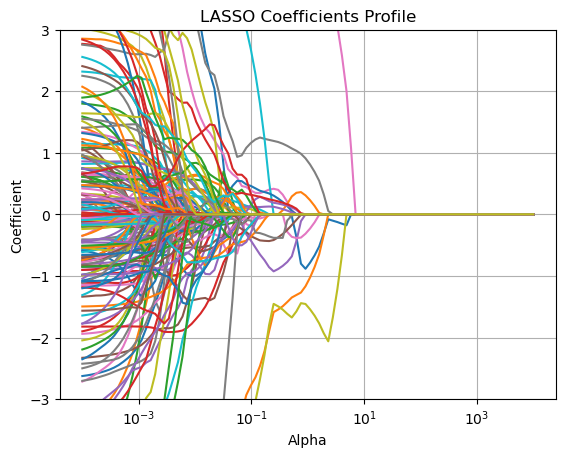

In [47]:
# Plot the LASSO profile (coefficients as a function of regularization)
coefs = []
for alpha in np.logspace(-4, 4, 100):
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

fig, ax = plt.subplots()
ax.plot(np.logspace(-4, 4, 100), coefs)
ax.set_xscale('log')
ax.set_xlabel('Alpha')
ax.set_ylabel('Coefficient')
ax.set_title('LASSO Coefficients Profile')
plt.ylim(-3, 3)
ax.grid(True)
plt.show()

# QUESTION: What is the difference in the LASSO coefficient profile compared to Ridge above?

Différences dans le profil des coefficients entre LASSO et Ridge :

1.Évolution des coefficients :

- Lasso : En augmentant la régularisation (alpha), Lasso a tendance à forcer certains coefficients à devenir exactement zéro, ce qui conduit à une sélection des variables. Dans le profil des coefficients, vous verrez que certains coefficients chutent brusquement à zéro au fur et à mesure que l'alpha augmente.

- Ridge : Dans le cas de Ridge, la régularisation réduit la taille des coefficients, mais aucun coefficient n'est mis à zéro. Tous les coefficients restent non nuls, mais leur taille diminue progressivement avec un alpha plus élevé.

2.Sélection des variables :

- Lasso : En raison de la régularisation L1, Lasso effectue une sélection automatique des variables en éliminant celles qui ne sont pas importantes. C'est pourquoi certains coefficients sont exactement égaux à zéro pour les valeurs plus grandes d'alpha.

- Ridge : Avec la régularisation L2, tous les coefficients sont réduits en valeur, mais aucune variable n'est complètement éliminée du modèle. Ridge conserve toutes les caractéristiques, mais en diminue l'importance.

3.Complexité du modèle :

- Lasso produit des modèles plus parcimonieux en supprimant certaines variables inutiles, ce qui simplifie le modèle.
- Ridge garde un modèle plus complexe en conservant toutes les caractéristiques, même si certaines sont fortement régularisées.

4.Graphiques des profils des coefficients :

- Lasso : Le profil des coefficients montre des lignes qui chutent brusquement à zéro lorsque l'alpha augmente.
- Ridge : Les coefficients diminuent plus doucement à mesure que l'alpha augmente, sans jamais devenir exactement zéro.

En résumé, Lasso est plus adapté si vous souhaitez réduire la complexité du modèle en éliminant des variables, tandis que Ridge est utile si vous voulez garder toutes les variables, mais en réduisant leur impact.

In [56]:
# ************************************ Elastic Net 

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNetCV

# Define a smaller range of alpha and l1_ratio values to speed up the process
alphas = np.logspace(-3, 3, 50)  # Fewer alpha values
l1_ratios = np.linspace(0, 1, 5)  # Fewer l1_ratio values

# Normalisation des données
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate the model with cross-validation and fewer folds (cv=5)
elasticnetcv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, max_iter=1000, tol=1e-4)

# Fit the model
elasticnetcv.fit(X_train_scaled, y_train)

# Predict on test set
y_pred = elasticnetcv.predict(X_test_scaled)

/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35266.85378874741, tolerance: 7.234180854251013
  model = cd_fast.enet_coordinate_descent_gram(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descen

# QUESTION: Why is it necessary to set a tolerance in the optimization algorithm?

La tolérance dans un algorithme d'optimisation sert de critère d'arrêt pour déterminer quand l'algorithme doit cesser d'itérer. Elle définit la précision avec laquelle l'algorithme doit trouver la solution optimale. Plus précisément :

1.Critère d'arrêt : Lorsque l'amélioration du modèle devient infime (en dessous de la tolérance définie), l'algorithme juge que continuer à itérer n'apporterait plus de gain significatif. Ainsi, l'algorithme s'arrête lorsque la différence entre deux étapes successives devient inférieure à la valeur de la tolérance.

2.Vitesse de convergence : Une tolérance plus grande (par exemple, 1e-2) peut entraîner un arrêt plus rapide, ce qui peut être utile si on veut obtenir une solution approximative rapidement. En revanche, une tolérance plus petite (par exemple, 1e-6) permettra une solution plus précise, mais au prix d'un nombre d'itérations plus élevé, ce qui peut ralentir le processus d'optimisation.

3.Gestion des données bruitées : Si les données contiennent du bruit, il peut être inutile de rechercher une solution extrêmement précise. Fixer une tolérance raisonnable permet d’éviter de surajuster le modèle à des fluctuations dues au bruit.

En résumé, fixer une tolérance permet à l'algorithme d'éviter les itérations inutiles une fois que l'optimisation a atteint un certain degré de précision, ce qui permet de trouver un bon compromis entre précision et temps de calcul.

In [58]:
# Fit the model on the training data
elasticnetcv.fit(X_train, y_train)

# Best values of alpha and l1_ratio
print(f'Best alpha: {elasticnetcv.alpha_}')
print(f'Best l1_ratio: {elasticnetcv.l1_ratio_}')

/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35309.51015936554, tolerance: 7.234180854251013
  model = cd_fast.enet_coordinate_descent_gram(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descen

Best alpha: 0.012648552168552958
Best l1_ratio: 1.0


/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 390.10174128955987, tolerance: 7.557493751263904
  model = cd_fast.enet_coordinate_descent_gram(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:614: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 568.1729885426148, tolerance: 7.557493751263904
  model = cd_fast.enet_coordinate_descent_gram(
/Users/user/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.776e+01, tolerance: 9.325e+00
  model = cd_fast.enet_coordinate_descent(


# QUESTION: What can you conclude by looking at the best l1_ratio?

Le meilleur l1_ratio trouvé par le modèle Elastic Net est de 1.0. Cela signifie que le modèle se comporte essentiellement comme un modèle Lasso (régularisation L1) plutôt qu'une combinaison des régularisations L1 et L2.

Conclusions :
- Pure régularisation L1 : Lorsque l'l1_ratio est égal à 1, Elastic Net applique uniquement la régularisation L1, ce qui pénalise la somme des valeurs absolues des coefficients. Cela favorise la sélection de variables, en mettant certains coefficients à zéro.
- Absence de régularisation L2 : La composante L2 (qui contrôle la somme des carrés des coefficients et agit plus comme Ridge) n'est pas utilisée dans ce cas. Donc, Elastic Net agit exactement comme Lasso, ce qui suggère que Lasso est mieux adapté à ces données que Ridge ou une combinaison des deux.
En somme, les caractéristiques des données et le problème d'optimisation semblent mieux convenir à une régularisation L1 pure (Lasso), privilégiant la réduction des coefficients et la sélection de variables importantes, plutôt qu'une combinaison avec L2.

In [60]:
# Check the performance of the model
print('MSE (training): %.2f' % mean_squared_error(y_train, elasticnetcv.predict(X_train)),
      'MSE (test): %.2f' % mean_squared_error(y_test, elasticnetcv.predict(X_test)), sep='\n')

MSE (training): 6.19
MSE (test): 7.28
